# QF 634 Applied Quantitative Research
## Homework 3 | YU LINGFENG
#### Logistic Regression
* Decision Trees
* Random Forest
* Area under the ROC Curve

### <font color = green> Activation of necessary libraries. </font>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from scipy import stats
from IPython.display import display
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
%matplotlib inline
from random import sample
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## 👉 <a id = "top">Content Table</a> 👈 
## [Q0. Data set preparation](#q0)

### <font color = green> Import Data </font>
### <font color = green> train_test_split </font>

## [Q1. Random Forest Classifier](#q1)

### <font color = green> model training </font>

## [Q2. Confusion Matrix](#q2)

### <font color = green> if y = 0 is positive, the confusion Matrix is

#### <font color = red> (row y=0) TP FN </font>
#### <font color = red> (row y=1) FP TN </font>

#### <font color = green> FPR = FP/(TN+FP) </font>

## [Q3. Classification Report](#q3)

### <font color = green> precision | recall | f1-score | support </font>


## [Q4. Area under the ROC Curve](#q4)

### <font color = green> fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_RF)   </font>

## [Q5. Importance Features](#q5)

### <font color = green> StandardScaler() </font>
### <font color = green> Dimentioinality Reduction </font>
    
## [Q6. Compare with Logistic Regression](#q6)

### <font color = green> Logistic Regression() </font>
### <font color = green> Accurancy </font>

## <a id = "q0">0. </a> <font color = "green"> Data set preparation </font>  [back to table of contents](#top)

### <font color = "blue"> `IMPORT` dataset: `banking3.csv`. </font> 
### <font color = "blue"> prepare dataset

In [78]:
file_path = 'banking3.csv'
df = pd.read_csv(file_path, header = 0, index_col = 0)
df

,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success,y
0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4.866,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
41184,4.860,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41185,4.857,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41186,0.742,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   euribor3m             41188 non-null  float64
 1   job_blue-collar       41188 non-null  int64  
 2   job_housemaid         41188 non-null  int64  
 3   marital_single        41188 non-null  int64  
 4   education_illiterate  41188 non-null  int64  
 5   default_no            41188 non-null  int64  
 6   contact_cellular      41188 non-null  int64  
 7   month_apr             41188 non-null  int64  
 8   month_aug             41188 non-null  int64  
 9   month_dec             41188 non-null  int64  
 10  month_jul             41188 non-null  int64  
 11  month_jun             41188 non-null  int64  
 12  month_mar             41188 non-null  int64  
 13  month_may             41188 non-null  int64  
 14  month_nov             41188 non-null  int64  
 15  month_oct             41

In [80]:
df.shape

(41188, 19)

In [81]:
list(df.columns)[:2]

['euribor3m', 'job_blue-collar']

In [82]:
droplist = []

In [83]:
data = df.drop(columns=droplist)
data

,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success,y
0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4.866,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
41184,4.860,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41185,4.857,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41186,0.742,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [84]:
X_unscale=data.iloc[:, :-1]
X_unscale

,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success
0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1
3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4.866,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41184,4.860,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41185,4.857,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41186,0.742,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### <font color = "blue"> StandardScaler() transformed data

In [85]:
col_names = X_unscale.columns
col_names

Index(['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_single',
       'education_illiterate', 'default_no', 'contact_cellular', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'poutcome_failure',
       'poutcome_success'],
      dtype='object')

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_unscale)
X = scaler.transform(X_unscale)
X = pd.DataFrame(X, columns = col_names)
X

,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success
0,0.773575,1.857642,-0.162528,-0.624938,-0.02091,-1.946613,0.75857,-0.261274,2.380521,-0.066621,-0.459253,-0.385042,-0.115907,-0.708640,-0.332532,-0.133197,-0.33929,-0.18570
1,0.230456,-0.538317,-0.162528,-0.624938,-0.02091,0.513713,0.75857,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,-0.708640,3.007225,-0.133197,-0.33929,-0.18570
2,-1.667578,-0.538317,-0.162528,1.600160,-0.02091,0.513713,0.75857,-0.261274,-0.420076,-0.066621,-0.459253,2.597117,-0.115907,-0.708640,-0.332532,-0.133197,-0.33929,5.38503
3,-1.277824,-0.538317,-0.162528,-0.624938,-0.02091,0.513713,0.75857,3.827393,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,-0.708640,-0.332532,-0.133197,-0.33929,-0.18570
4,-1.586859,-0.538317,-0.162528,-0.624938,-0.02091,0.513713,0.75857,-0.261274,2.380521,-0.066621,-0.459253,-0.385042,-0.115907,-0.708640,-0.332532,-0.133197,-0.33929,5.38503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.717649,-0.538317,-0.162528,-0.624938,-0.02091,-1.946613,-1.31827,-0.261274,-0.420076,-0.066621,-0.459253,2.597117,-0.115907,-0.708640,-0.332532,-0.133197,-0.33929,-0.18570
41184,0.714190,-0.538317,6.152772,-0.624938,-0.02091,-1.946613,-1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.33929,-0.18570
41185,0.712460,-0.538317,-0.162528,1.600160,-0.02091,-1.946613,-1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.33929,-0.18570
41186,-1.660082,-0.538317,-0.162528,-0.624938,-0.02091,0.513713,-1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,-0.708640,-0.332532,7.507656,-0.33929,-0.18570


In [87]:
X = X_unscale # no need to scale in this Homework 3

In [88]:
y=data.iloc[:, -1]
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [89]:
X.shape, y.shape

((41188, 18), (41188,))

In [90]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size = 0.3, random_state = 0) 

In [91]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28831, 18), (28831,), (12357, 18), (12357,))

## <a id = "q1">1. </a> <font color = "green"> Random Forest Classifier </font>  [back to table of contents](#top)

In [92]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=1000, 
                                  random_state=1, 
                                  max_features=None, 
                                  max_depth=None)
### default n_estimators/trees = 1000; default criterion = 'gini' 
### max_features default case is "sqrt"; 
### unlike DecisionTree Classifier where default case = "none"
### If max_depth=None, 
### then nodes are expanded until all leaves are pure or
### until all leaves contain less than 
###   min_samples_split samples -- usually is 2

### bootsrapping - bagging, default=true
### oob_scorebool, default=False 
###   -- Whether to use out-of-bag samples 
### to estimate the generalization score. 
###    Only available if bootstrap=True.
RF_model.fit(X_train,y_train)

y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.8969814679938496


In [93]:
y_test.sum()/len(y_test)

0.11135388848425994

In [94]:
y_train.sum()/len(y_train)

0.11321147376088238

In [95]:
y.sum()/len(y)

0.11265417111780131

## <a id = "q2">2. </a> <font color = "green"> Confusion Matrix </font>  [back to table of contents](#top)

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
confusion_matrix

array([[10682,   299],
       [  974,   402]], dtype=int64)

if y = 0 is positive,
the confusion Matrix is

#### TP=10676 FN=305
#### FP=987 TN=389

FPR = FP/(TN+FP)

## <a id = "q3">3. </a> <font color = "green"> Classification Report </font>  [back to table of contents](#top)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10981
           1       0.57      0.29      0.39      1376

    accuracy                           0.90     12357
   macro avg       0.74      0.63      0.67     12357
weighted avg       0.88      0.90      0.88     12357



In [98]:
len(X_test)

12357

## <a id = "q4">4. </a> <font color = "green"> Area under the ROC Curve </font>  [back to table of contents](#top)

In [99]:
preds_RF = RF_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_RF)  
    ### matches y_test of 1's and 0's versus
    ### pred prob of 1's for each of the 12357 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) 
    ### requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds 
    ### (Decreasing thresholds used to compute fpr and tpr)
roc_auc_RF = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_RF

0.7713693962404408

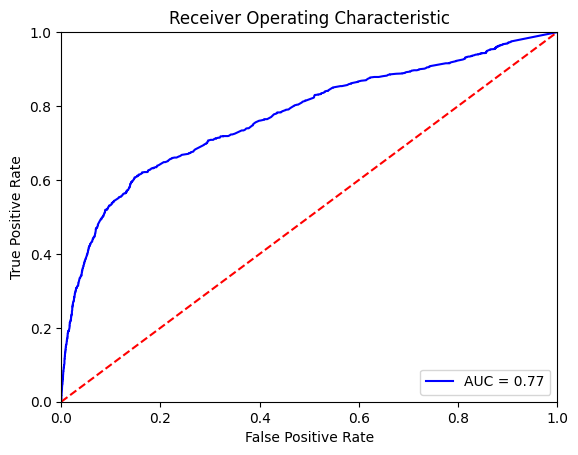

In [100]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## <a id = "q5">5. </a> <font color = "green"> Importance features</font>  [back to table of contents](#top)

In [101]:
import time

start_time = time.time()
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for
              tree in RF_model.estimators_],
             axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: \
{elapsed_time:.3f} seconds")
### importances.shape is (18,)

Elapsed time to compute the importances: 0.078 seconds


In [102]:
range(len(col_names))

range(0, 18)

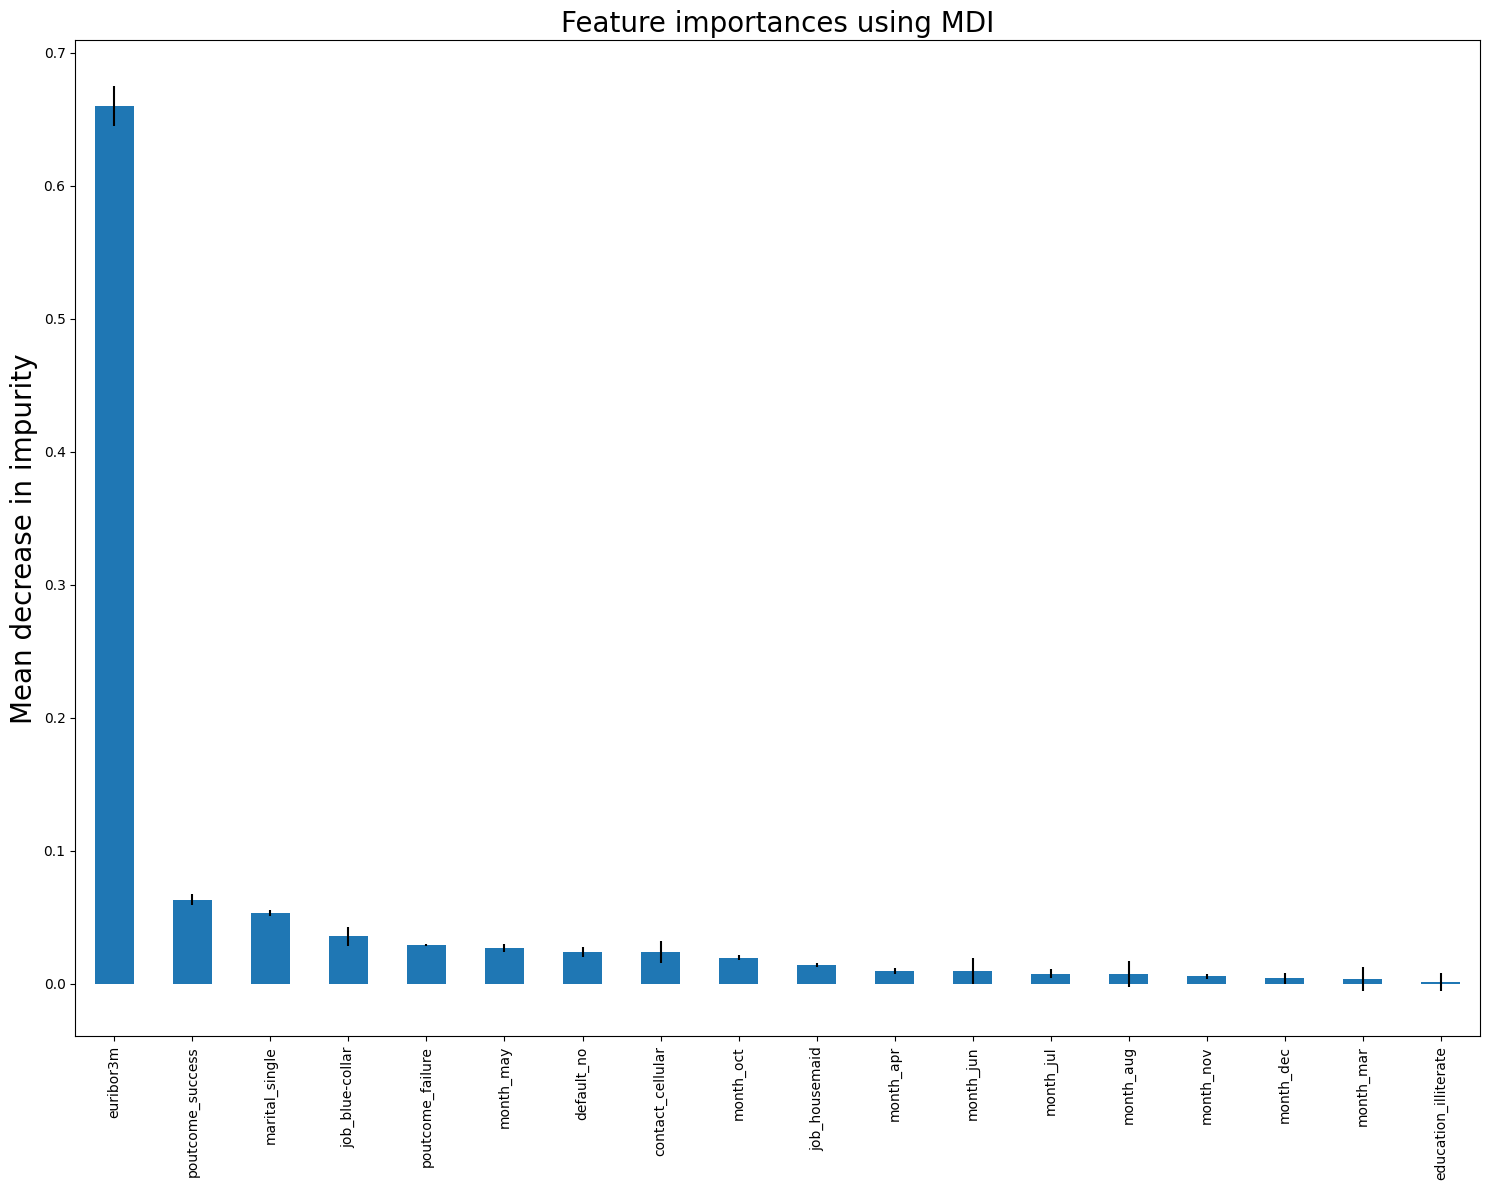

In [103]:
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(15,12))
forest_importances.plot.bar(yerr=std, ax=ax) 
### thin line indicates 1 std err from the mean either way 
###    -- doesn't mean mean decrease is neg
ax.set_title("Feature importances using MDI",fontsize=20)  
### MDI is mean decrease in impurity 
ax.set_ylabel("Mean decrease in impurity",fontsize=20)
ax.set(xticks=(range(len(col_names))))
### define own x-ticks to avoid clutter, entry must be a list
fig.tight_layout()

### Note: Negative feature importance value means 
###    that feature makes the loss go up. 
### either model is underfitting with not enough iteration
###    and not enough splitting use of feature or feature should be removed

In [104]:
RF_model.feature_importances_  ### they sum to one

array([0.66008517, 0.03574613, 0.01397125, 0.05345306, 0.00142858,
       0.02407047, 0.02396583, 0.00984752, 0.00742382, 0.00411203,
       0.00757395, 0.00983875, 0.00365068, 0.02709057, 0.00552117,
       0.01970993, 0.02919743, 0.06331367])

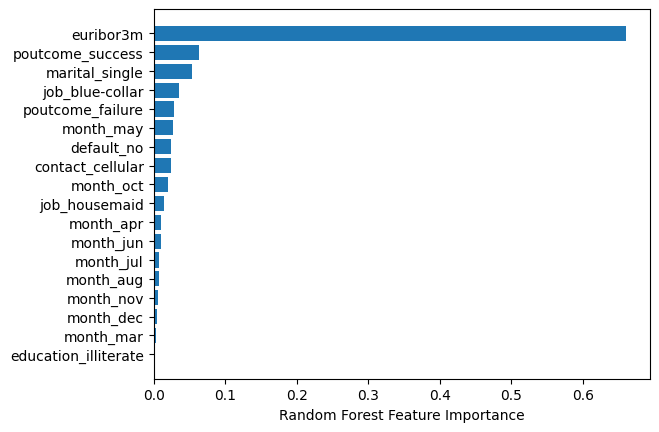

<Figure size 1600x1200 with 0 Axes>

In [105]:
### another representation
sorted_idx = RF_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],
         RF_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.figure(figsize=(20, 15), dpi=80)
fig.tight_layout()

## <a id = "q6">6. </a> <font color = "green"> Compare Logistic Regression</font>  [back to table of contents](#top)

In [106]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=1, 
                        multi_class='multinomial',
                        solver='newton-cg')
LR = LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.9007849801731812


In [107]:
LR.coef_

array([[-0.2510839 , -0.11409778, -0.08563686,  0.02786442,  0.40601714,
         0.13961956,  0.0707584 , -0.32224361, -0.1895754 , -0.09860541,
        -0.04041471, -0.08077064,  0.19048256, -0.63371158, -0.24300055,
         0.04911362, -0.17714593,  0.74073303]])

In [108]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix)

[[10880   101]
 [ 1125   251]]


In [109]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.18      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [110]:
# calculate the fpr and tpr for all thresholds of the classification
preds_LR = LR.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_LR)  
    ### matches y_test of 1's and 0's versus
    ###    pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires
    ###    y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds 
    ###    (Decreasing thresholds used to compute fpr and tpr)
roc_auc_LR = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_LR

0.7904534298672337

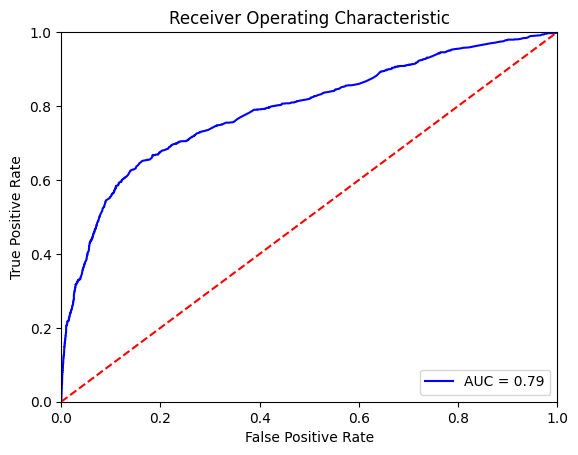

In [111]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Making comparison

In [112]:
AUC_list = [roc_auc_RF, roc_auc_LR]
model_list = ['Random Forest', 'Logistic Regression']
df_AUC= pd.DataFrame({'Model': model_list, 'AUC': AUC_list})
df_AUC

,Model,AUC
0,Random Forest,0.771369
1,Logistic Regression,0.790453


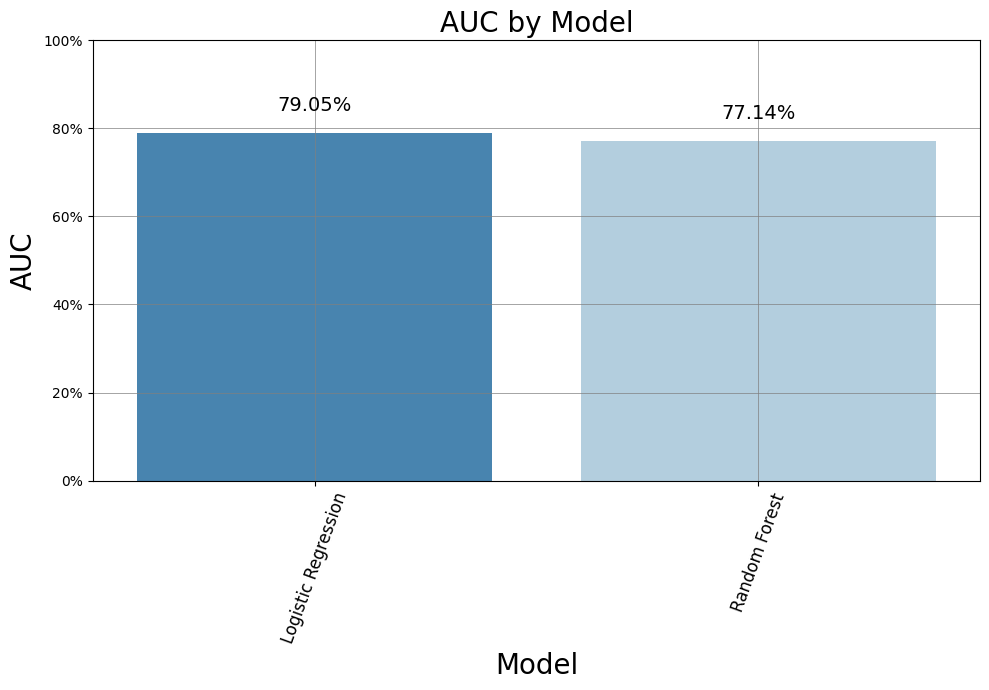

In [113]:
order = list(df_AUC.sort_values('AUC', ascending=False).Model)
df_AUC =\
    df_AUC.sort_values('AUC',
                       ascending=False).reset_index().drop(['index'],
                                                           axis=1)

plt.figure(figsize=(10,7))
# make barplot and sort bars
x = sns.barplot(x='Model', y="AUC", 
                data=df_AUC, 
                order = order, 
                palette="Blues_r")

plt.xlabel("Model", fontsize=20)
plt.ylabel("AUC", fontsize=20)
plt.title("AUC by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_AUC.loc[i, 'AUC'] + 0.05, 
             s = str(round((df_AUC.loc[i, 'AUC'])*100, 2))+'%', 
             fontsize = 14, 
             color='black',
             horizontalalignment='center')

plt.tight_layout()